# OMICs Interplay in Cardiometabolic Disease:<br>Applying Machine and Deep Learning for Multiple OMICs Data Integration
#### Nikolay Oskolkov, SciLifeLab, NBIS Long Term Support, [nikolay.oskolkov@scilifelab.se](nikolay.oskolkov@scilifelab.se)

<h3><center>Abstract</center></h3>
In this project we will analyze Malmö Offspring Study (MOS) data on ~1000 human individuals with multiple OMICs layers, such as Genomics, Proteomics, Metabolomics, Gut Microbiota 16S, Gut Microbiota Metagenomics and Clinical Parameters, and apply Machine and Deep Learning methodology for data integration and prediction of individual phenotypes such as disease status.

For demostration purposes we will concentrate on Gender (i.e. Male and Female) classification, i.e. binary classification problem, and BMI group (i.e. Lean, Overweight or Obese) classification, i.e. multiple class problem. The ultimate goal is to demonstrate how an Artificial Neural Network can be set up for Biological Big Data integration analysis, i.e. a Deep Learning approach. Further, we will compare the Deep Learning with other most established linear (Logistic Regression, Linear Discriminant Analysis) and non-linear (K-nearest Neighbors, Random Forest, Support Vector Machines) Machine Learning methods. The methods will be comparaed based on cross-validation procedure and ROC curve evaluation, the best method will be applied for prediction of Gender and BMI class on a validation data set. 

### Table of Contents:
* [Project Description](#Project Description)
* [What Are Our Data Sets and How They Look Like?](#What Are Our Data Sets and How They Look Like?)
* [Introduction to Artificial Neural Networks (ANN)](#Introduction to Artificial Neural Networks (ANN)
* [Gender Prediction with ANN from Single OMIC Data](#Gender Prediction with ANN from Single OMIC Data)
* [Comparison with Machine Learning for Single OMIC Data](#Comparison with Machine Learning for Single OMIC Data)
* [Multiple OMICs Integration and BMI Prediction](#Multiple OMICs Integration and BMI Prediction)

### Project Description <a class="anchor" id="Project Description"></a>

**BACKGROUND:** 
Cardiovascular disease, obesity, type 2 diabetes and related traits, collectively referred to as cardiometabolic disease (CMD), are the major morbidities and causes of death worldwide. Metabolites, which represent functional endpoints and are closest to the phenotype, have been shown to be increasingly useful for CMD risk prediction. Increasing evidence is also proposing an important role for the gut microbiota in human health and disease, and in particular in metabolic diseases, but the studies have been small in size. Therefore, integration of human multi-omic data with microbiome data in large prospective cohorts is required.

**AIMS:**
The project aims to study the interaction between body fluid metabolites, circulating proteins, gut microbiota composition and human genetic variation in a large prospective population-based cohort with baseline diet recording in order to establish their connection to CMD traits.

**PROJECT DESCRIPTION:**
Participants of the Malmö Offspring Study (MOS), i.e. an ongoing collection of adult children and grand-children of the Malmö Diet and Cancer Study participants, are included (n=2,200 recruited to date and the goal is 5000 individuals by 2020). At baseline examination, blood, saliva and stools are collected. Furthermore, the following clinical parameters are measured: anthropometry, blood lipids, vascular traits (blood pressure, pulse wave velocity or intima media thickness of the carotid artery). In addition, dietary intake is registered through a 4 days web-based dietary record which is cross validated with a food propensity questionnaire.

* **Metabolomics:** Metabolites are analyzed using hydrophilic interaction liquid chromatography coupled to mass spectrometry (HILIC UHPLC-MS) and with reverse phase UHPLC-MS. In total 250 metabolites, covering amino acids, amino acids derivatives, acylcarnithines, bile acids and TCA cycle intermediates are identified, of which 50 are absolutely and 200 relatively quantified. Furthermore, several thousand additional metabolic features are being measured but need further confirmation.

* **Gut Microbiome:** The V1-V3 region of the 16S rRNA is amplified from fecal DNA and sequenced on a HighSeq instrument. High-quality sequence reads are binned into operational taxonomic units (OTUs) using the Quantitative Insights Into Microbial Ecology (QIIME) pipeline and their relative abundance is assessed; additionally, singletons and low abundances reads (<0.001%) are removed. In total, 60-70 gut microbiota genera are typically measured. In addition, short gun Metagenomics data from 110 individuals

* **Genome wide genotyping:** Individuals were genome-wide genotyped using the Illumina Infinium HumanOmniExpress Exome BeadChip. Quality control is currently ongoing. Genome wide association analyses will thereafter be performed in PLINK.

* **Protein Biomarkers:** A panel of 344 proteins of Proseek multiplex Olink panels "CVDI", "CVDII", "Inflammation" and “Metabolism” were quantified from fasting plasma by immunoassay followed by amplification of a specific reporter sequence by PCR and quantification through real-time PCR.

**SIGNIFICANCE:**
By combining several omics approaches and using a large and well-powered population-based cohort, we will certainly generate new results and may significantly influence our understanding of the role of proteins, metabolites, gut microbiota and genes in CMD associated traits and diseases.


### What Are Our Data Sets and How They Look Like? <a class="anchor" id="What Are Our Data Sets and How They Look Like?"></a>
We will start with loading OMICs data sets using **pandas** module in Python and have a look at the dimensions of the data sets, i.e. how many samples (n) and how many features (p) we have. We will start with looking at Gut Microbiota 16S data that were pre-filtered (low abundance species removed) and CSS normalized by QIIME pipeline:

In [1]:
import os
import pandas as pd
os.chdir("/home/nikolay/WABI/M_Orho_Mellander/DeepLearning/")
gut_microb = pd.read_csv('OTU_table_1236_L6_Filtered_CSS_Normalized_IDs_Fixed_GENDER_BMI_GROUP.txt',sep='\t')
gut_microb.shape

(1236, 67)

Thus we have 1236 individuals and 65 microbes in the data set since the last two columns are the **GENDER** and **BMI_GROUP** columns, respectively. We assigned each individual to Lean, Overweight or Obese group based on the following griterion:

* Lean: BMI below 25
* Overweight: BMI between 25 and 30
* Obese: BMI above 30

Let us preview first a few rows and columns in the Gut Microbiota data set:

In [2]:
gut_microb.iloc[1:10, 1:10]

,Adlercreutzia,Collinsella,Bacteroidales;f;g,Bacteroides,Parabacteroides,Prevotella,RF16;g,Rikenellaceae;g,Alistipes
55992114,11.494461,10.351230,3.526860,20.757942,17.074209,7.651052,3.526860,17.758564,3.526860
55992109,6.365306,8.764579,1.223493,15.038885,12.097212,12.848917,5.616595,14.284893,1.223493
55992108,6.253021,6.443300,2.672729,19.674536,15.138117,7.137349,3.554919,8.104303,2.672729
55991103,10.905483,12.126257,2.705947,18.294377,15.120167,11.218088,2.705947,16.219905,7.176387
55991102,5.962311,10.620788,2.024137,18.789223,14.968731,4.838315,2.024137,15.799709,2.024137
55392206,5.408648,8.640932,10.281455,16.662079,11.387061,4.996391,3.865390,14.123894,6.167717
53752104,10.723144,12.407485,3.100264,20.849447,14.758676,6.636405,3.100264,16.622386,4.013598
53751101,0.781058,7.777359,0.781058,15.389694,10.533643,12.342300,0.781058,12.540761,8.268992
50772105,12.339252,4.786374,2.659730,18.666098,13.268545,14.900087,7.374115,16.940515,2.659730


We will aslo preview a few last columns of the data set in order to see the **GENDER** and **BMI_GROUP** columns:

In [3]:
gut_microb.iloc[1:10, 57:67]

,Cetobacterium,Fusobacterium,RF32;f;g,Sutterella,Oxalobacter,Enterobacteriaceae;g,RF39;f;g,Akkermansia,GENDER,BMI_GROUP
55992114,3.526860,4.462879,8.756820,13.595718,3.526860,4.462879,3.526860,4.462879,Male,Overweight
55992109,1.223493,2.664586,8.122588,10.481367,1.223493,1.223493,1.223493,10.731828,Male,Obese
55992108,2.672729,7.081176,2.672729,3.554919,7.243532,8.496714,2.672729,2.672729,Male,Obese
55991103,2.705947,5.093779,2.705947,3.590928,2.705947,2.705947,9.023303,12.136915,Male,Obese
55991102,2.024137,4.674680,7.507649,2.024137,7.889938,7.432785,12.170998,9.284707,Female,Overweight
55392206,0.810770,1.705953,5.827995,10.327905,0.810770,2.961129,1.326707,8.968667,Male,Lean
53752104,3.100264,5.280911,9.581486,11.499317,3.100264,5.945000,3.100264,14.942763,Female,Lean
53751101,0.781058,2.591855,0.781058,8.822946,3.723847,1.657719,0.781058,6.200800,Male,Obese
50772105,2.659730,2.659730,2.659730,4.083847,2.659730,8.144224,2.659730,5.256786,Male,Overweight


### Introduction to Artificial Neural Networks (ANN) <a class="anchor" id="Introduction to Artificial Neural Networks (ANN"></a>
In this section we will brifly describe what Artificial Neural Networks (ANN) are, why to use them in Computational Biology, and how they work. In order to introduce principals of ANN we will start with a few basic definitions. 

**1. Machine Learning (ML)**

Machine Learning is a powerful technique that allows to map input **X** to output **Y** as
<h3><center>Y = f ( X )</center></h3>
without necessarily knowing the functional form of **f**. Machine Learning provides two major benifits that have a wide application in Biomedicine:
* **Prediction:** Biomedicine needs precise classification of disease sub-types in order to make correct treatment prescription
* **Feature Selection:** Biomedicine needs biomarkers for understanding mechanisms of a disease

Machine Learning can be categorized into:
* **Parametric**: assumtion on *f(X)*, often linear, easy to learn, fast, little data needed, **poor prediction** (example: Linear and Logistic Regression)
* **Non-Parametric**: assumtion free, difficult to train, slow, needs a lot of data, **higher prediction power** (example: Random Forest, LASSO)

Machine Learning includes a variaty of approaches, concepts and algorithms that can be approximately summarized by the tree below:

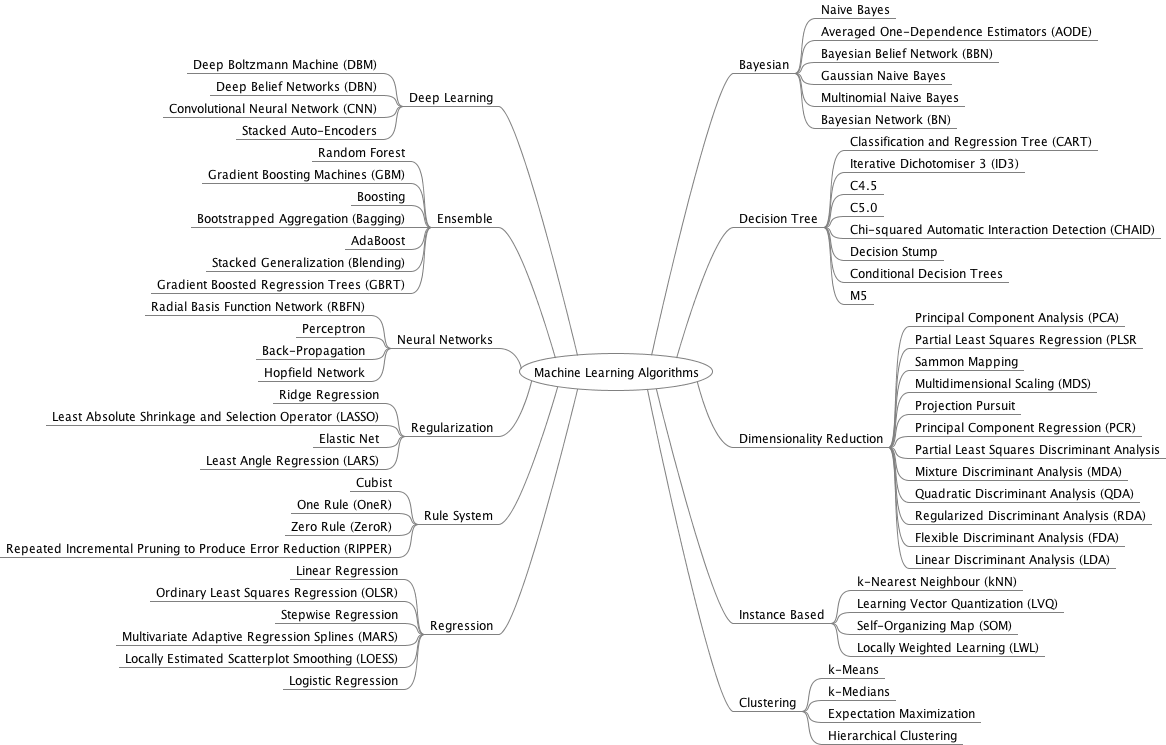

In [4]:
from IPython.display import Image
Image('MachineLearningAlgorithms.png')

Canonical Machine Learnig workflow includes four steps: 1) data cleaning and pre-processing, 2) feature extraction, 3) model fitting, and 4) evaluation:

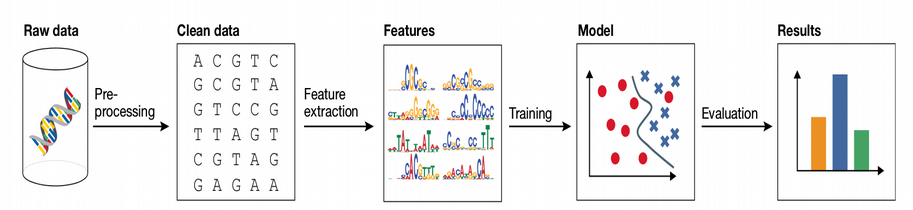

In [5]:
from IPython.display import Image
Image('ML.png')

The main advantages of **Deep Learning** over Machine Learning are:
* **Feature Extraction**
* **Scalability**

To use Machine Learning features have to be pre-defined, **Deep Learning** has a unique ability of Feature Extraction, i.e. it is capable of identifying features by itself. For example, if we analyze RNAseq data, Machine Learning would require a table of read counts for each annotated gene, while Deep Learning needs raw reads to be able to use its full power. Another disadvantage of Machine Learning is that its performance saturates with growing amount of data in multi-dimensional spaces. For example, it is a chellenge to use **LASSO** or **Random Forest** for Genome-Wide Association Studies (GWAS) as time becomes a bottleneck. Deep Artificial Neural Networks overcome the problem of scalability.

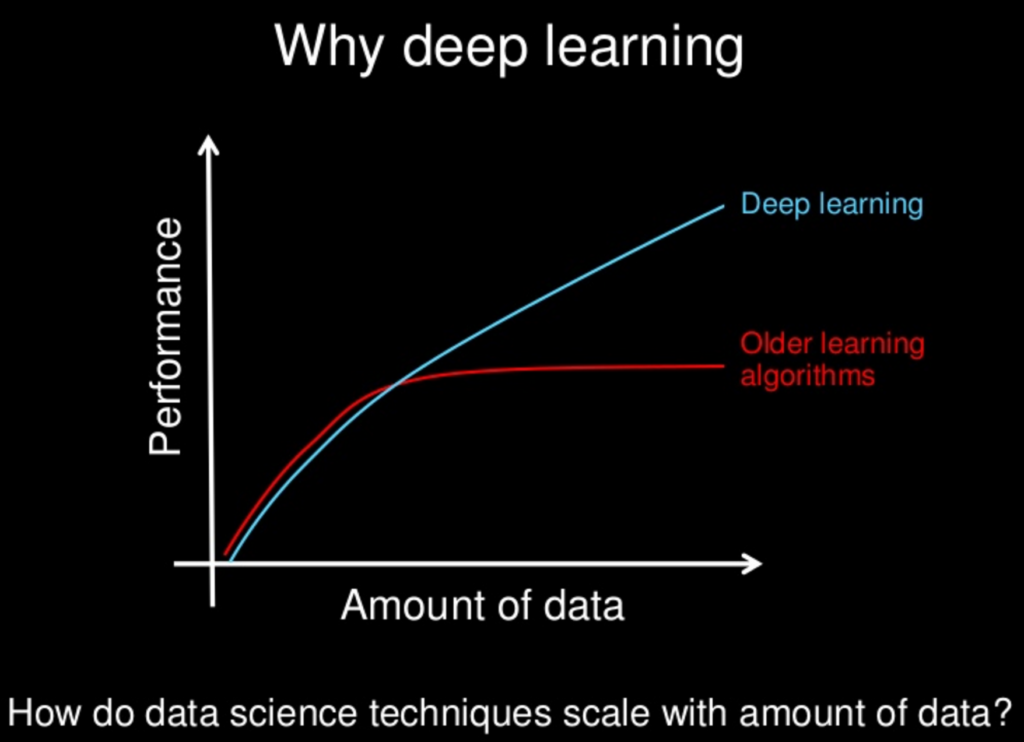

In [6]:
from IPython.display import Image
Image('WhyDeepLearning.png', width = 600)

Finally, an additional advantage of Deep Artificial Neural Networks over Machine Learning is due to the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) that states that a feed-forward network, with a single hidden layer, containing a finite number of neurons, can approximate continuous functions with mild assumptions on the activation function.

**2. Artificial Neural Networks (ANN)**

Artificial Neural Network takes the raw data at the lowest (input) layer and transforms them into increasingly abstract feature representations by successively combining outputs from the preceeding layer in a data-driven manner, encapsulating highly complicated functions in the process.

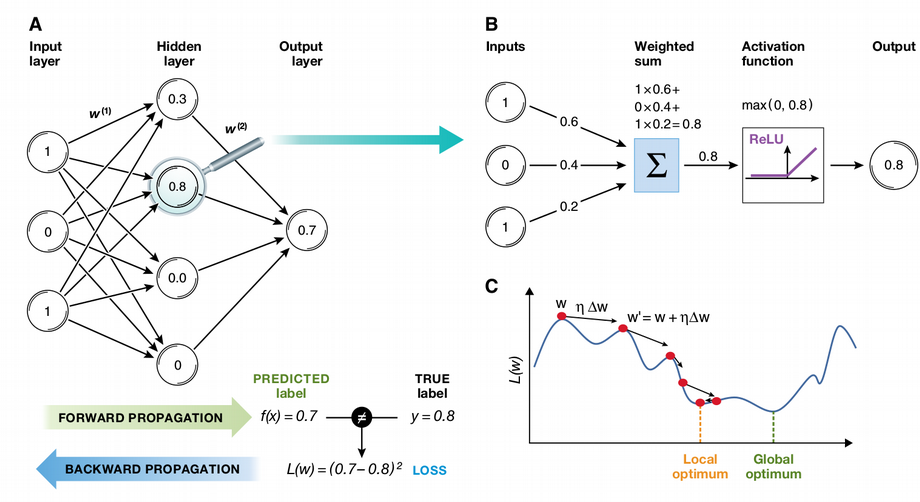

In [7]:
from IPython.display import Image
Image('ANN.png')

Artificial Neural Network receives data in an input layer, which are then transformed in a nonlinear way through multiple hidden layers, before final outputs are computed in the output layer. Neurons in a hidden or output layer are connected to all neurons of the previous layer, i.e. **fully connected network**. Each neuron computes a linear weighted sum of its inputs and applies a **nonlinear activation function** to calculate its output *f(x)*.

The weights *w* between neurons are free parameters that are learned from input/output samples. Learning is performed by **gradient descent** that minimizes a loss function *L(w)* that measures the fit of the model output to the true label of a sample via the **backward propagation algorithm** that computes a loss function gradient via chain rule for derivatives. During learning, the predicted label is compared with the true label to compute a loss for the current set of model weights. The loss is then backward propagated through the network to compute the gradients of the loss function and updates for the weights.

While learning in deep neural networks remains an active area of research, existing software packages can already be applied without knowledge of the mathematical details involved.

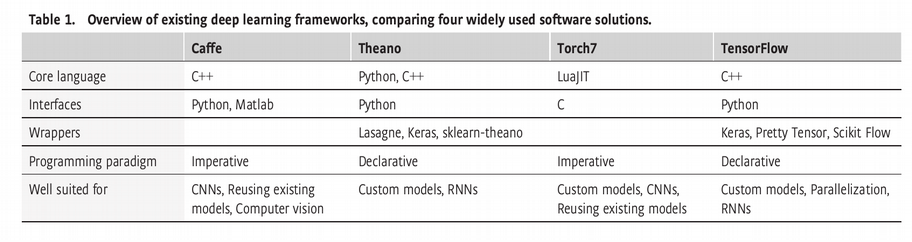

In [8]:
from IPython.display import Image
Image('Software.png')

Finally, let us emphasize a few elegant concepts heavily imlemented in Artificial Neural Networks which represent the beauty of Data Analysis:
* **Maximum Likelihood**
* **Cross-Validation**
* **Bootstrapping**
* **Regularization**
* **Bayesian Statistics**
* **Multivariate Feature Selection**
* **Monte Carlo Approximation**
* **Bagging and Boosting**

And last but not least, the table of major hyperparameters of an Artificial Neural Network:

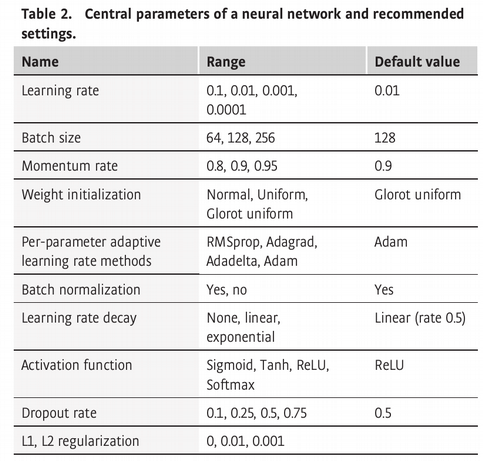

In [9]:
from IPython.display import Image
Image('Hyperparameters.png')

### Gender Prediction with ANN from Single OMIC Data <a class="anchor" id="Gender Prediction with ANN from Single OMIC Data"></a>
We can use the Gut Microbiota single OMIC data set in order to try to predict for example Gender of the MOS individuals. For this purpose, we will select the **GENDER** column and assign it to **Y** variable, this is a binary vector. The matrix of microbial abundances will be assign to **X**, it will be used for feature selection and generating prediction of the classes in **Y**. In addition, we need to convert the **Y** vector into the binary format:

In [10]:
from sklearn.preprocessing import label_binarize
X = gut_microb.values[:,0:65]
Y = gut_microb.values[:,65]
print("Here is how Y looked like before binarization:")
print(Y[0:10])
print()
Y = label_binarize(Y, classes = ['Female', 'Male'])
print("And here is how Y look like after binarization")
print(Y[0:10])
print()
print("The dimensions of X and Y are",X.shape,"\b and",Y.shape,"\b, respectively")

Here is how Y looked like before binarization:
['Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male']

And here is how Y look like after binarization
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]

The dimensions of X and Y are (1236, 65)  and (1236, 1) , respectively


To use any Machine / Deep Learning algorithms we need to split our data set into training, validation and testing sub-sets, see the figure below. This is easy to do with **train_test_split** function from **sklearn** Python module. We define 20% of the data set to be used for ultimate testing of the prediction. The training sub-set which represents the rest 80% of data will be further split into "truly training" and validation sub-sets when doing cross-validation.  

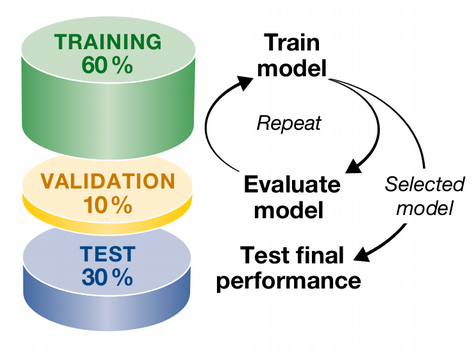

In [11]:
from IPython.display import Image
Image('TrainTestSplit.png')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("The dimensions of X_train and Y_train are",X_train.shape,"\b and",Y_train.shape,"\b, respectively")
print("The dimensions of X_test and Y_test are",X_test.shape,"\b and",Y_test.shape,"\b, respectively")

The dimensions of X_train and Y_train are (988, 65)  and (988, 1) , respectively
The dimensions of X_test and Y_test are (248, 65)  and (248, 1) , respectively


We are going to work using **keras** wrapper of Google product called **tensorflow**, therefore we will start loading all important functions from **keras** module: 

In [13]:
import sys
import os
os.environ['KERAS_BACKEND']='tensorflow'

import numpy as np
import scipy as sp
import random as rn
import sklearn as sk
import pandas as pd

from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import tensorflow as tf

import keras
from keras import metrics, regularizers, optimizers
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,15)

import warnings
warnings.filterwarnings('ignore')

print()
print("Python {}".format(sys.version))
print('Pandas {}'.format(pd.__version__))
print('Numpy {}'.format(np.__version__))
print('Scikit-Learn {}'.format(sk.__version__))
print()
print("Tensor Flow Version: {}".format(tf.__version__))
print("Keras Version: {}".format(keras.__version__))

Using TensorFlow backend.



Python 3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas 0.20.3
Numpy 1.13.1
Scikit-Learn 0.19.1

Tensor Flow Version: 1.3.0
Keras Version: 2.0.9


Now we will define the Artificial Neural Network (ANN) model as a function of hyperparameters such as the number of neurons in the hidden layer, activation function, gradient descent optimization method, learning rate, Ridge L2 norm regularization parameter *alpha* etc. We will later find the optimal values for some of those hyperparameters via cross-validation procedure.

In [14]:
def pipline(inp_dim,
            n_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            alpha = 0.0):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='')
    
    X = main_input
    for nod in n_nod:
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(alpha))(X)
        
    output = Dense(1, activation = out_act_fun )(X)
    
    method = getattr(keras.optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun, metrics = ['accuracy'])   
    
    return model

# Define the network, cost function and minimization method
INPUT = {'inp_dim': X_train.shape[1],         
         'n_nod': [10, 10],                 # number of nodes in hidden layer
         'act_fun': 'relu',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.001,                  # learningrate
         'alpha': 0.1                       # L2 regularization parameter
        }

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 65)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                660       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


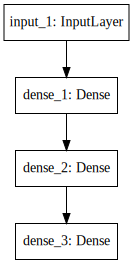

In [15]:
import pydot_ng as pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Now we are going to fit the model and use the *hold-out* method to monitor training and validation a) Accuracy, b) Error

Training Accuracy:  0.718987341169
Validation Accuracy:  0.611111111713


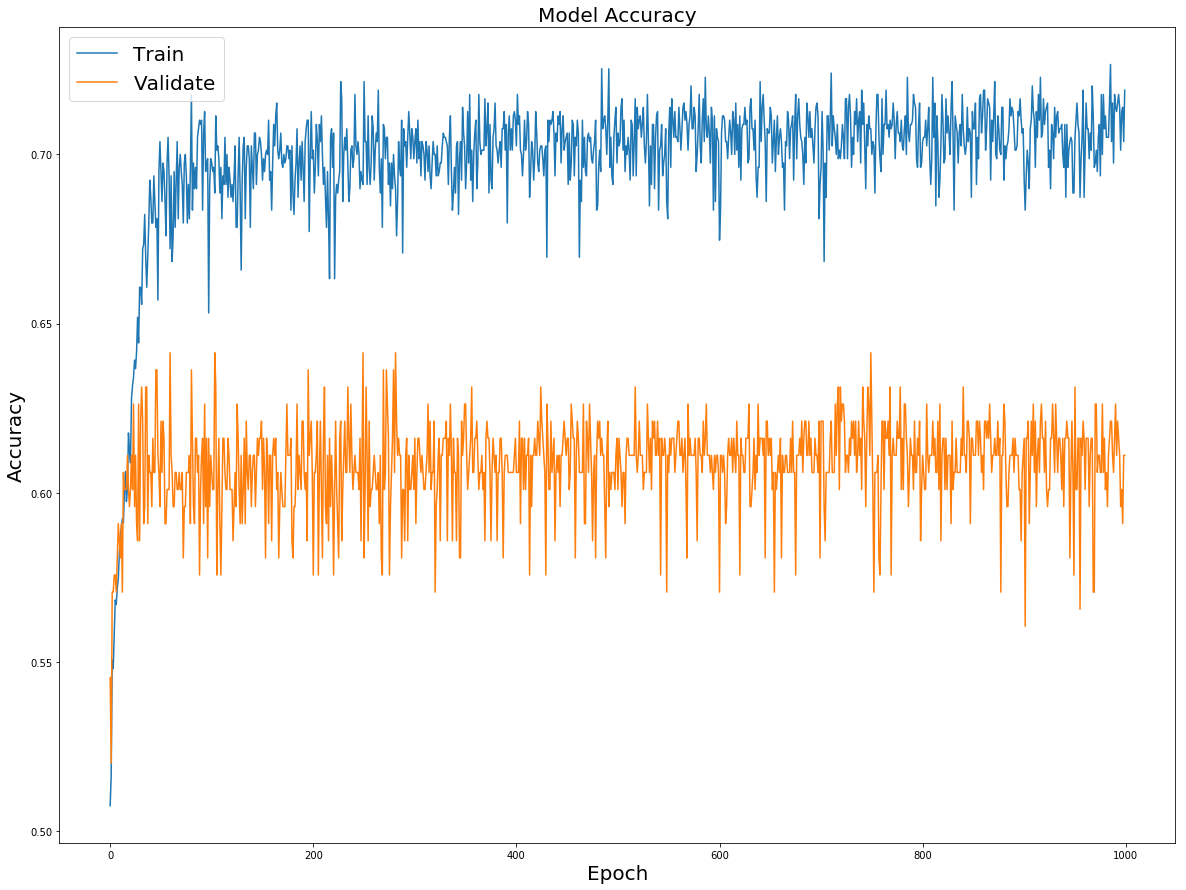

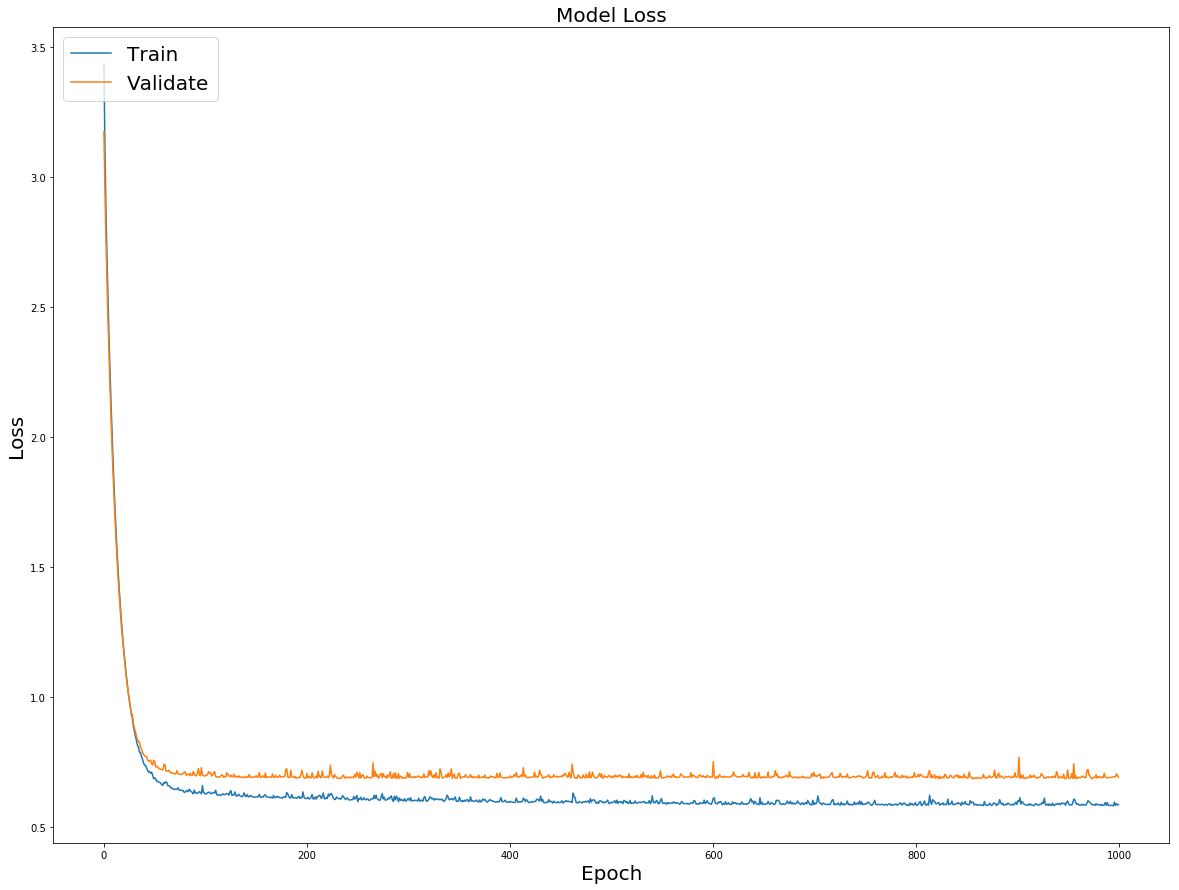

In [16]:
estimator = model.fit(X_train, Y_train, epochs = 1000, batch_size = 64, validation_split = 0.2, 
                      verbose = 0, shuffle = True)
print("Training Accuracy: ",estimator.history['acc'][-1])
print("Validation Accuracy: ",estimator.history['val_acc'][-1])

# summarize history for accuracy
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validate'], loc='upper left', fontsize = 20)
plt.show()
# summarize history for loss
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validate'], loc='upper left', fontsize = 20)
plt.show()

In this way we can monitor overfitting which is manifested by increasing validation loss and decreasing validation accuracy:

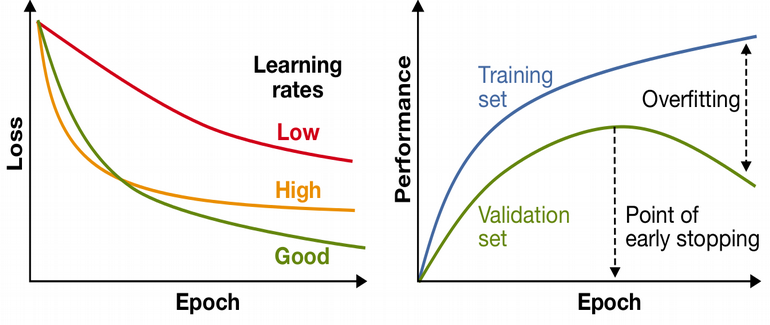

In [67]:
from IPython.display import Image
Image('/home/nikolay/WABI/M_Orho_Mellander/DeepLearning/Training.png')

We can see that we managed to avoid overfitting by specifying an appropriate Ridge L2 norm regularization parameter. We can also immediately evaluate our model on the test (untouched) data set.

In [17]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
ann_test_accuracy = scores[1]
ann_pred_probs = model.predict(X_test)[:,0]

248/248 [==============================] - 0s 39us/step

acc: 68.55%


Next, we seem to have correctly guessed good combination of hyper parameters. However to do it in a more literal way, one needs to perform a computationally expensive operation called grid search cross-validation for identifying optimal hyperparameters. Lets us for exmaple check what would be optimal values of *alpha* and which activation function gives best accuracy on the validation data set:

In [23]:
def create_keras_model(neurons = 10, alpha = 0.1, act_fun = 'relu'):
    keras_model = Sequential()
    keras_model.add(Dense(neurons, input_dim = X_train.shape[1], activation = act_fun,
                          kernel_regularizer = regularizers.l2(alpha)))
    keras_model.add(Dense(neurons, activation = act_fun, kernel_regularizer = regularizers.l2(alpha)))
    keras_model.add(Dense(Y_train.shape[1], activation = 'sigmoid'))
    my_optimizer = keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
    keras_model.compile(loss = 'binary_crossentropy', optimizer = my_optimizer, metrics = ['accuracy'])
    return keras_model

#Define grid for each hyperparameter
epochs = 100
batch_size = 64
neurons = [2, 5, 10, 15, 20]
alpha = [0.0, 0.0001, 0.001, 0.01, 0.1, 1]
act_fun = ['relu']

#Wrap the model into KerasClassifier 
keras_model = KerasClassifier(build_fn = create_keras_model, verbose = 0, batch_size = batch_size, epochs = epochs)

#Run grid search cross-validation procedure
import time
start_time = time.time()
param_grid = dict(neurons = neurons, alpha = alpha, act_fun = act_fun)
grid = GridSearchCV(estimator = keras_model, param_grid = param_grid, n_jobs = 1, cv = 10)
grid_result = grid.fit(X_train, Y_train)

#Collect results and display best combination of hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print()
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
stop_time = time.time()
print()
print("It took {0} seconds for the program to run".format(stop_time - start_time))

Best: 0.655870 using {'act_fun': 'relu', 'alpha': 0.1, 'neurons': 15}

0.493927 (0.042948) with: {'act_fun': 'relu', 'alpha': 0.0, 'neurons': 2}
0.587045 (0.064675) with: {'act_fun': 'relu', 'alpha': 0.0, 'neurons': 5}
0.611336 (0.044356) with: {'act_fun': 'relu', 'alpha': 0.0, 'neurons': 10}
0.617409 (0.042816) with: {'act_fun': 'relu', 'alpha': 0.0, 'neurons': 15}
0.625506 (0.041580) with: {'act_fun': 'relu', 'alpha': 0.0, 'neurons': 20}
0.515182 (0.078548) with: {'act_fun': 'relu', 'alpha': 0.0001, 'neurons': 2}
0.623482 (0.030257) with: {'act_fun': 'relu', 'alpha': 0.0001, 'neurons': 5}
0.621457 (0.043065) with: {'act_fun': 'relu', 'alpha': 0.0001, 'neurons': 10}
0.615385 (0.040554) with: {'act_fun': 'relu', 'alpha': 0.0001, 'neurons': 15}
0.591093 (0.047780) with: {'act_fun': 'relu', 'alpha': 0.0001, 'neurons': 20}
0.526316 (0.077553) with: {'act_fun': 'relu', 'alpha': 0.001, 'neurons': 2}
0.608300 (0.060121) with: {'act_fun': 'relu', 'alpha': 0.001, 'neurons': 5}
0.621457 (0.0300

In [20]:
print('Optimized Hyperparameters:')
print('=================================================')
#act_fun = grid_result.best_params_['act_fun']
act_fun = 'relu'
#alpha = grid_result.best_params_['alpha']
alpha = 0.1
#neurons = grid_result.best_params_['neurons']
neurons = 10
print('Number of Neurons in Hidden Layers:', neurons)
print('Ridge L2 Norm Regularization Parameter:', alpha)
print('Activation Function:', act_fun)

Optimized Hyperparameters:
Number of Neurons in Hidden Layers: 10
Ridge L2 Norm Regularization Parameter: 0.1
Activation Function: relu


Now when we have identified the optimal hyperparameters, we can check how stable is the fit of our model via sratified K-fold cross-validation procedure. Here we will build a vector of typical validation accuracies produced by Artificial Neural Network (ANN) which will be later compared with other major Machine Learning techniques.

In [22]:
epochs = 100
batch_size = 64

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits = 10, shuffle = True)
cvscores = []
for train, test in kfold.split(X_train, Y_train):
    keras_model = Sequential()
    keras_model.add(Dense(neurons, input_dim = X_train.shape[1], activation = act_fun,
                          kernel_regularizer = regularizers.l2(alpha)))
    keras_model.add(Dense(neurons, activation = act_fun, kernel_regularizer = regularizers.l2(alpha)))
    keras_model.add(Dense(Y_train.shape[1], activation = 'sigmoid'))
    my_optimizer = keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
    keras_model.compile(loss = 'binary_crossentropy', optimizer = my_optimizer, metrics = ['accuracy'])
    keras_model.fit(X_train[train], Y_train[train], epochs = epochs, batch_size = batch_size, validation_split = 0.2, 
                    verbose = 0, shuffle = True)    
    scores = keras_model.evaluate(X_train[test], Y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% ( +/- %.2f%% )" % (np.mean(cvscores), np.std(cvscores)))

acc: 73.74%
acc: 64.65%
acc: 69.70%
acc: 61.62%
acc: 61.62%
acc: 66.67%
acc: 60.61%
acc: 62.63%
acc: 68.37%
acc: 65.31%
65.49% ( +/- 3.98% )


Another popular regularization technique is called **Early Stopping**. It implies monitoring the validation loss function and determination of an epoch when it starts increasing, the training is broken at that epoch and the model keeps the optimal weights:

Epoch 00322: early stopping
Training Accuracy:  0.674683544304
Validation Accuracy:  0.626262625661


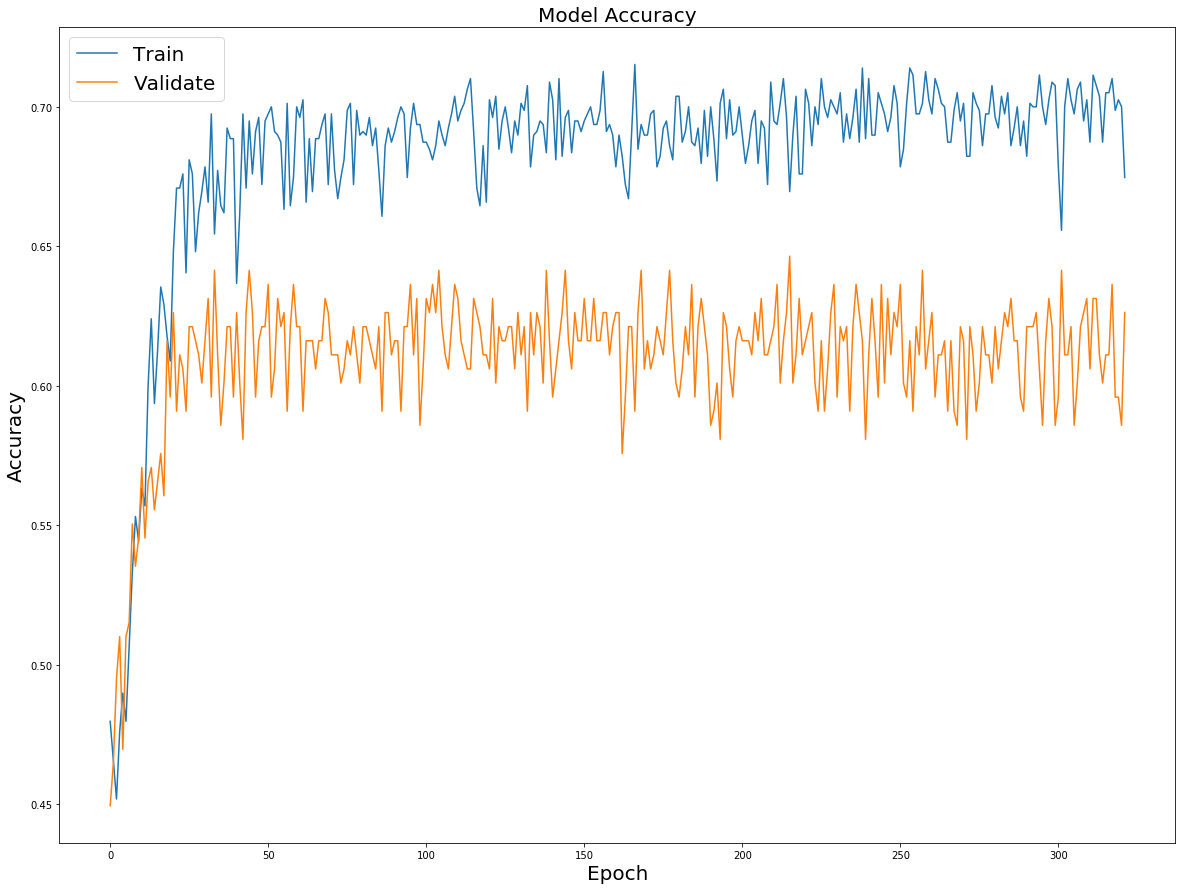

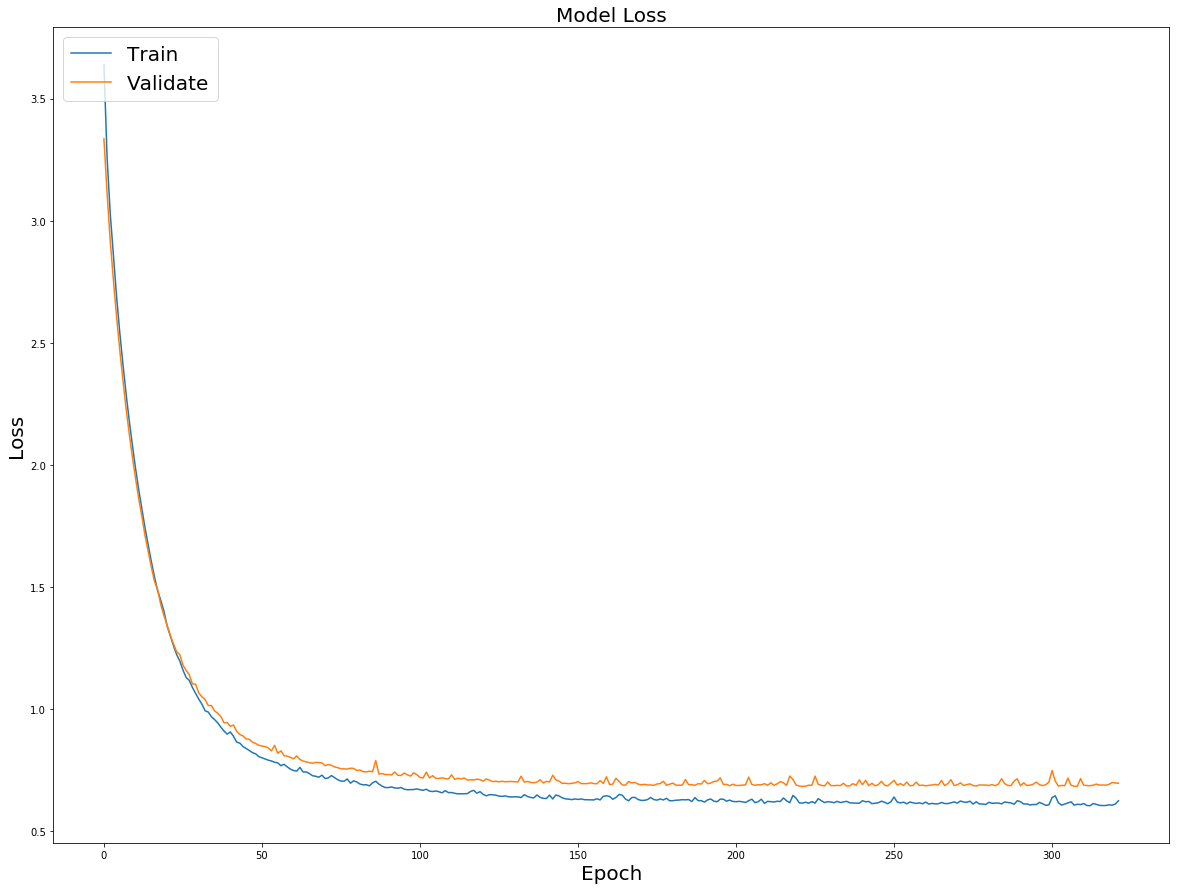

In [23]:
from keras.callbacks import EarlyStopping
model = pipline(**INPUT)
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 100, verbose = 1, mode = 'auto')
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 1000, batch_size = 64, 
                    verbose = False, callbacks = [monitor], shuffle = True)
print("Training Accuracy: ",history.history['acc'][-1])
print("Validation Accuracy: ",history.history['val_acc'][-1])

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validate'], loc='upper left', fontsize = 20)
plt.show()
# summarize history for loss
plt.figure(figsize=(20,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validate'], loc='upper left', fontsize = 20)
plt.show()

Further, Artificial Neural Networks can be regularized by dropout procedure, which reperesents random dropping nodes from the training so that the rest of the nodes can adjust their weights, in this way ANN reaches better performance on validation and test data sets.

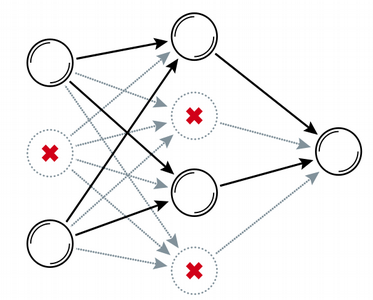

In [68]:
from IPython.display import Image
Image('/home/nikolay/WABI/M_Orho_Mellander/DeepLearning/Dropout.png')

Let us now generate and plot a confusion matrix for our predictions on the test (untouched) data set:

Confusion matrix
[[ 66  52]
 [ 30 100]]


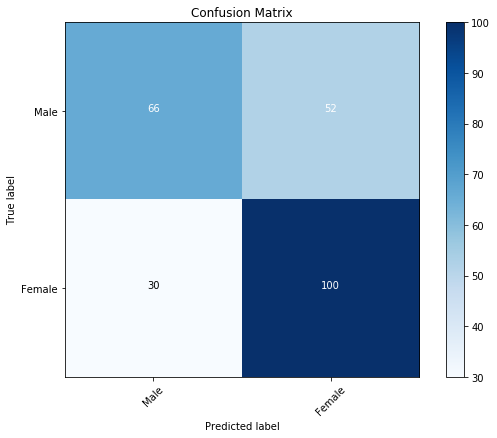

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model = pipline(**INPUT)
model.fit(X_train, Y_train, epochs = 1000, batch_size = 64, validation_split = 0.2, verbose = 0, shuffle = True)
predictions = model.predict(X_test)
predictions_rounded = [int(np.round(x)) for x in predictions]
confm = confusion_matrix(Y_test, predictions_rounded)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(confm, classes=['Male', 'Female'],
                      title='Confusion Matrix')
plt.show()

In [25]:
(confm[0,0]+confm[1,1])/(confm[0,0]+confm[1,0]+confm[0,1]+confm[1,1])

0.66935483870967738

In [26]:
from sklearn.metrics import classification_report
predictions_rounded = [int(np.round(x)) for x in predictions]
print(classification_report(Y_test, predictions_rounded))

             precision    recall  f1-score   support

          0       0.69      0.56      0.62       118
          1       0.66      0.77      0.71       130

avg / total       0.67      0.67      0.67       248



Thus Male individuals have lower prediction scores and Female individuals are the easiest to predict for the Machine Learning algorithms. In general ca. 66% of accuracy of Male vs. Female prediction is also what PLS model achieved previously on the Gut Mcrobiota data set.

### Comparison with Machine Learning for Single OMIC Data <a class="anchor" id="Comparison with Machine Learning for Single OMIC Data"></a>
We can use the Gut Microbiota single OMIC data set in order to try to predict for example Gender of the MOS individuals. For this purpose, we will select the **GENDER** column and assign it to **Y** variable, this is a binary vector. The matrix of microbial abundances will be assign to **X**, it will be used for feature selection and generating prediction of the classes in **Y**.

In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
#models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('MLP', MLPClassifier()))

results = []
names = []
test_accuracy = []
for name, model_ml in models:
    kfold = RepeatedKFold(n_splits = 5, n_repeats = 10)
    cv_results = cross_val_score(model_ml, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f +/- %f" % (name, cv_results.mean(), cv_results.std()))
    
    model_ml.fit(X_train, Y_train)
    predictions_ml = model_ml.predict(X_test)
    test_accuracy.append(accuracy_score(Y_test, predictions_ml))

results.append([x/100 for x in cvscores])
names.append('ANN')
test_accuracy.append(ann_test_accuracy)
print("%s: %f +/- %f" % (names[-1], np.mean(results[-1]), np.std(results[-1])))

LR: 0.641397 +/- 0.031708
LDA: 0.639062 +/- 0.032258
KNN: 0.549095 +/- 0.031635
NB: 0.628848 +/- 0.028397
SVM: 0.513159 +/- 0.033131
CART: 0.561638 +/- 0.035462
RF: 0.586033 +/- 0.030466
ADA: 0.608405 +/- 0.023485
MLP: 0.615779 +/- 0.035255
ANN: 0.654886 +/- 0.039774


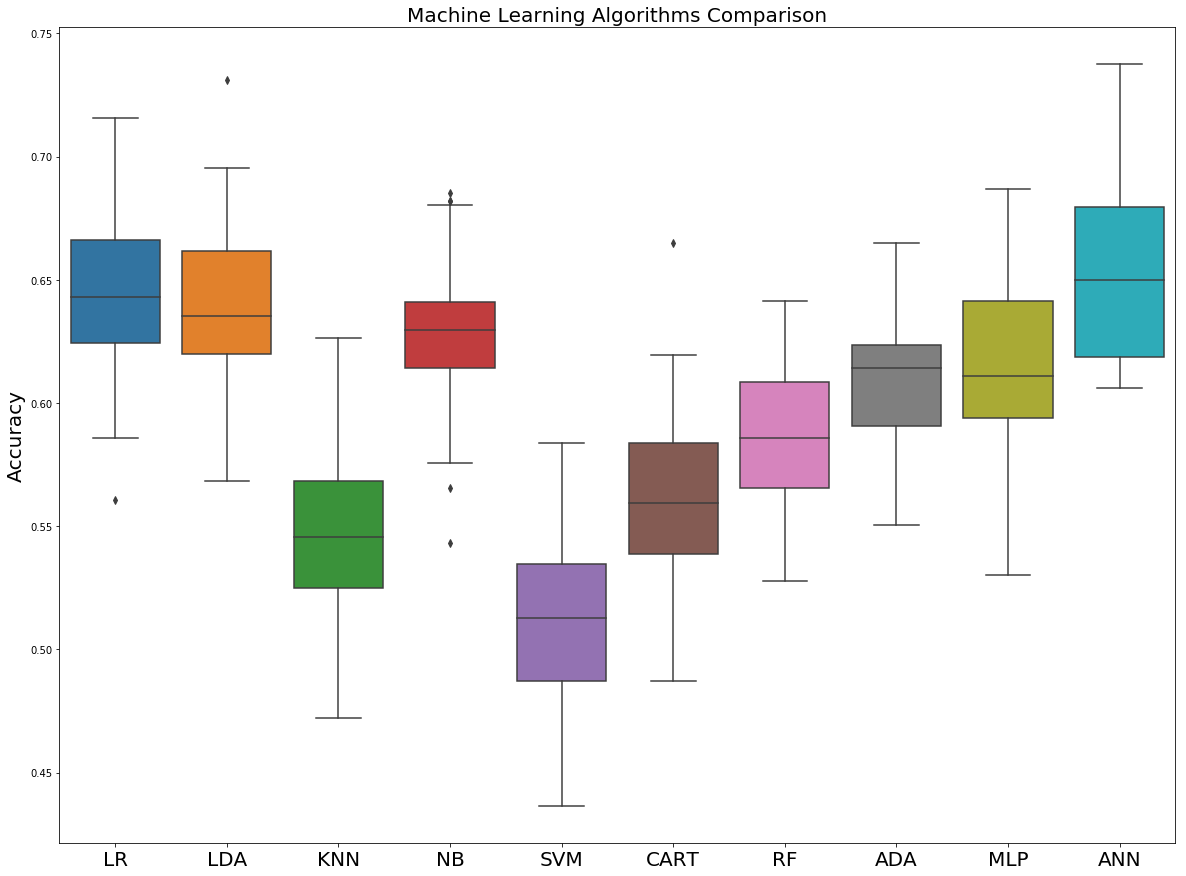

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,15))
plt.title('Machine Learning Algorithms Comparison', fontsize = 20)
ax = fig.add_subplot(111)
sns.boxplot(data=results, palette = 'tab10')
plt.ylabel('Accuracy',fontsize=20)
ax.set_xticklabels(names, fontsize = 20)
plt.show()

We conclude that ANN performs best on the validation data set via the K-fold cross-validation procedure. Finally we can compare ANN test accuracy with the one found by the traditional Machine Learning methods:

In [29]:
import operator
test_accuracy_dict = dict(zip(names,test_accuracy))
sorted(test_accuracy_dict.items(), key=operator.itemgetter(1), reverse = True)

[('ANN', 0.68548387096774188),
 ('LDA', 0.67338709677419351),
 ('LR', 0.66935483870967738),
 ('MLP', 0.6411290322580645),
 ('NB', 0.63709677419354838),
 ('ADA', 0.61290322580645162),
 ('KNN', 0.56854838709677424),
 ('RF', 0.56048387096774188),
 ('CART', 0.55645161290322576),
 ('SVM', 0.47177419354838712)]

Here we can observe that linear methods (Linear Discriminant Analysis and Logistic Regression) perform better than non-linear methods (K-Nearest Neighbors, Support Vector Machines and tree-based methods). This implies that Males and Females should be separated by a linear hyperplane in the 65-dimensional space and not by a complicated non-linear surface. Most importantly, we conclude the superior performance of Deep Artificial Neural Networks on both validation and test data sets over the traditional Machine Learning algorithms, the way it should be for Biological Big Data! 

Let us pot Receiver Operation Curves (ROC) for visualizing true positive and false positive rates for the machine learning methods used:

Logistic Regression :  0.66935483871
Linear Discriminant Analysis :  0.673387096774
K-Nearest Neighbors :  0.568548387097
Naive Bayes :  0.637096774194
Support Vector Machines :  0.471774193548
Decision Tree :  0.588709677419
Random Forest :  0.629032258065
ADABoost :  0.612903225806
MLP :  0.625


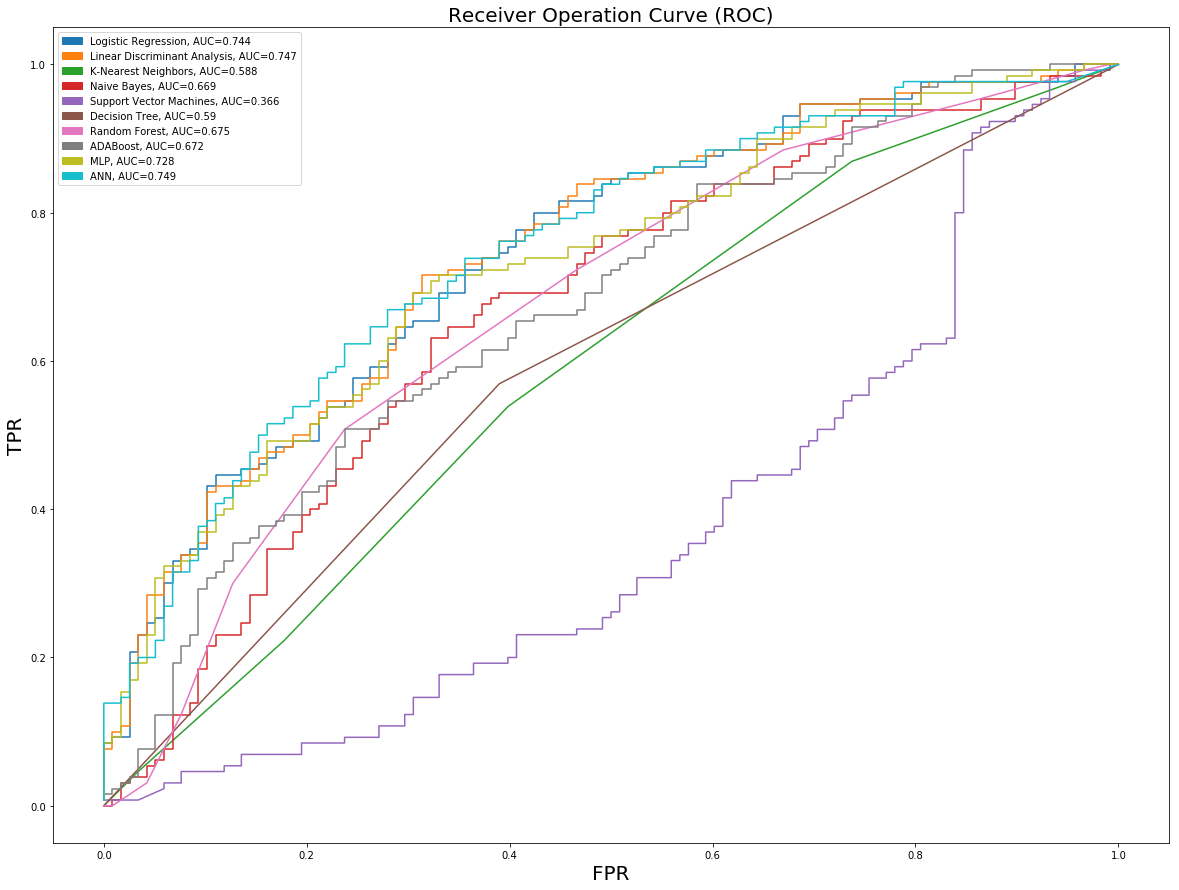

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machines', SVC(probability = True)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
#models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('ADABoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))

plt.figure(figsize=(20,15))
results = []
names = []
my_legends = []
color_index = 0
for name, model_ml in models:
    model_ml.fit(X_train, Y_train)
    predictions = model_ml.predict(X_test)
    print(name,": ",accuracy_score(Y_test, predictions))
    pred_probs = model_ml.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, pred_probs, drop_intermediate = True)
    df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
    with sns.color_palette("tab10",10):
        plt.plot(fpr, tpr)
    my_legends.append(mpatches.Patch(color = sns.color_palette("tab10",10)[color_index],
                                     label = name + ', AUC=' + str(round(auc(fpr, tpr),3))))
    color_index = color_index + 1

fpr_ann, tpr_ann, thresholds_ann = roc_curve(Y_test, ann_pred_probs, drop_intermediate = True)
df_ann = pd.DataFrame(dict(fpr = fpr_ann, tpr = tpr_ann))
with sns.color_palette("tab10",10):
    plt.plot(fpr_ann, tpr_ann)
my_legends.append(mpatches.Patch(color = sns.color_palette("tab10",10)[color_index],
                                 label = 'ANN' + ', AUC=' + str(round(auc(fpr_ann, tpr_ann),3))))

plt.ylabel('TPR',fontsize = 20)
plt.xlabel('FPR',fontsize = 20)
plt.legend()
plt.legend(handles = my_legends)
plt.title('Receiver Operation Curve (ROC)',fontsize = 20)
plt.show()

Each Machine Learning method is capable of doing feature selection, i.e. selection of most informative features. Artificial Neural Network can do feature selection by calculating numerically a derivative of output function with respect to each input feature, thus cheking how the output changes with input. Another possibility for ANN to do feature selection is to do dropout procedure on the input layer and check the effect of dropping each input feature out. Feature selection by ANN is to be implemented later. Here let us check most informative features produced by the canonical Machine Learning algorithms:

In [31]:
names = list(gut_microb.columns[0:65])

rf = RandomForestClassifier()
rf.fit(X, Y)
my_list_rf = sorted(zip(map(lambda x: str(round(x, 4)), rf.feature_importances_), names), reverse=True)

lr = LogisticRegression(penalty = 'l2')
lr.fit(X, Y)
my_list_lr = sorted(zip(map(lambda x: str(round(x, 4)), abs(lr.coef_[0])), names), reverse=True)

svc = SVC(kernel = 'linear')
svc.fit(X, Y)
my_list_svc = sorted(zip(map(lambda x: str(round(x, 4)), abs(svc.coef_[0])), names), reverse=True)

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
my_list_lda = sorted(zip(map(lambda x: str(round(x, 4)), abs(lda.coef_[0])), names), reverse=True)

ada = AdaBoostClassifier()
ada.fit(X, Y)
my_list_ada = sorted(zip(map(lambda x: str(round(x, 4)), ada.feature_importances_), names), reverse=True)

dtc = DecisionTreeClassifier()
dtc.fit(X, Y)
my_list_dtc = sorted(zip(map(lambda x: str(round(x, 4)), dtc.feature_importances_), names), reverse=True)

result_df = pd.DataFrame(dict(SVM = [x[1] for x in my_list_svc], RandomForest = [x[1] for x in my_list_rf], 
                              LogisticRegression = [x[1] for x in my_list_lr], 
                              LDA = [x[1] for x in my_list_lda], 
                              AdaBoost = [x[1] for x in my_list_ada], CART = [x[1] for x in my_list_dtc]))
result_df

,AdaBoost,CART,LDA,LogisticRegression,RandomForest,SVM
0,Halanaerobiaceae;g,Christensenellaceae;g,Lachnospiraceae;g,Lachnospiraceae;g,Streptophyta;f;g,Lachnospiraceae;g
1,[Ruminococcus],[Ruminococcus],[Ruminococcus],[Ruminococcus],Paraprevotella,Streptophyta;f;g
2,[Eubacterium],Roseburia,Streptophyta;f;g,Streptophyta;f;g,Christensenellaceae;g,[Ruminococcus]
3,Streptophyta;f;g,Streptophyta;f;g,Streptococcus,Streptococcus,[Ruminococcus],Streptococcus
4,Streptococcus,Streptococcus,Christensenellaceae;g,Christensenellaceae;g,Halanaerobiaceae;g,Succiniclasticum
5,Roseburia,Phascolarctobacterium,Clostridiales;f;g,Clostridiales;f;g,Lachnospiraceae;g,Dorea
6,Phascolarctobacterium,Adlercreutzia,Cetobacterium,Succiniclasticum,Streptococcus,Cetobacterium
7,Parabacteroides,Lactobacillus,[Paraprevotellaceae];g,[Paraprevotellaceae];g,Oxalobacter,Christensenellaceae;g
8,Oxalobacter,Peptococcus,Succiniclasticum,Cetobacterium,Lachnobacterium,[Paraprevotellaceae];g
9,Lactococcus,SHA-98;f;g,Lactococcus,Megasphaera,Akkermansia,Clostridiales;f;g


### Multiple OMICs Integration and BMI Prediction <a class="anchor" id="Multiple OMICs Integration and BMI Prediction"></a>
Here we will demonstrate how we can use Artificial Neural Networks for multiple OMICs data integration. We will apply the integrated data set for prediction of BMI on MOS individuals. 

In [32]:
import os
os.chdir('/home/nikolay/WABI/M_Orho_Mellander/IntegrativeOMICS/RecentResults/DataSets/ANN/')

met = pd.read_csv('Metabolomics.txt',sep='\t')
Y = label_binarize(met.iloc[:,-1], classes = ['Lean', 'Overweight', 'Obese'])
met = met.drop(labels='BMI_GROUP', axis=1)
gut_microb = pd.read_csv('GutMicrobiota.txt',sep='\t')
gut_microb = gut_microb.drop(labels='BMI_GROUP', axis=1)
prot = pd.read_csv('Proteomics.txt',sep='\t')
prot = prot.drop(labels='BMI_GROUP', axis=1)
phen = pd.read_csv('ClinicalParameters.txt',sep='\t')
phen = phen.drop(labels='BMI_GROUP', axis=1)
phen['sex'] = pd.get_dummies(phen['sex'])

met_train, met_test, Y_train, Y_test = train_test_split(met, Y, test_size = 0.2, random_state = 1)
gut_microb_train, gut_microb_test, Y_train, Y_test = train_test_split(gut_microb, Y, test_size = 0.2, random_state = 1)
prot_train, prot_test, Y_train, Y_test = train_test_split(prot, Y, test_size = 0.2, random_state = 1)
phen_train, phen_test, Y_train, Y_test = train_test_split(phen, Y, test_size = 0.2, random_state = 1)

print('Metabolomics:',met.shape)
print('Gut Microbiota:',gut_microb.shape)
print('Proteomics:',prot.shape)
print('Phenotypes:',phen.shape)
print()
print('Here are the labels in one-hot encoding format:\n',Y)

Metabolomics: (595, 48)
Gut Microbiota: (595, 65)
Proteomics: (595, 344)
Phenotypes: (595, 2)

Here are the labels in one-hot encoding format:
 [[1 0 0]
 [1 0 0]
 [0 0 1]
 ..., 
 [1 0 0]
 [0 1 0]
 [1 0 0]]


One-hot encoding is used for multiple classes prediction and is better way of coding classes compared to "1, 2, 3, ..." as it does not assume any order between the numbers. Note that we used *random_state* argument while using hold-out concept to ensure that exactly the same individuals were selected for training and testing across all the OMICs data sets.

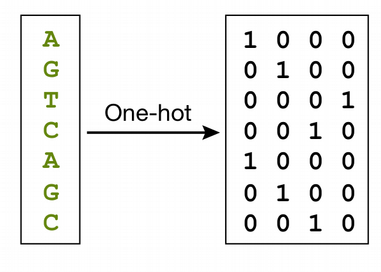

In [69]:
from IPython.display import Image
Image('/home/nikolay/WABI/M_Orho_Mellander/DeepLearning/OneHotEncoding.png')

For constructing an Artificial Neural Network that integrates multiple OMICs layers we will use **Keras Functional API** concept. Briefly, we will assign individual hidden layers to each of the OMICs, which are input at visible layers, then we concatenate the outputs from the hidden layers and process it through another "common" hidden layer. In parallel we will apply dropout and Ridge L2 Norm regularization on each visible and hidden layer, respectively: 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           (None, 48)           0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           (None, 65)           0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           (None, 344)          0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
dropout_41

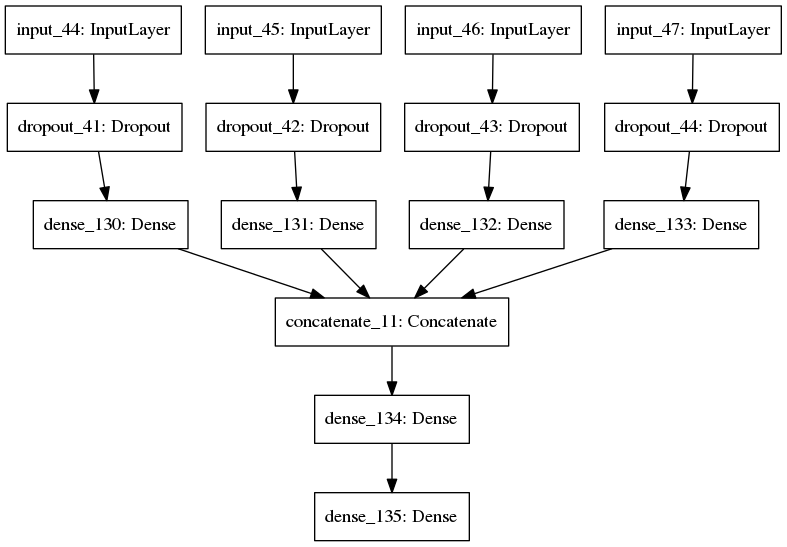

In [61]:
# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate

neurons = 2
alpha = 0.0
dropout_rate = 0.0

# Metabolomics Model
visible1 = Input(shape=(met_train.shape[1],))
drop1 = Dropout(dropout_rate, input_shape=(met_train.shape[1],))(visible1)
hidden1 = Dense(neurons, kernel_initializer='uniform', activation='relu', 
                kernel_regularizer = regularizers.l2(alpha))(drop1)

# Gut Microbiota Model
visible2 = Input(shape=(gut_microb_train.shape[1],))
drop2 = Dropout(dropout_rate, input_shape=(gut_microb_train.shape[1],))(visible2)
hidden2 = Dense(neurons, kernel_initializer='uniform', activation='relu', 
                kernel_regularizer = regularizers.l2(alpha))(drop2)

# Proteomics Model
visible3 = Input(shape=(prot_train.shape[1],))
drop3 = Dropout(dropout_rate, input_shape=(prot_train.shape[1],))(visible3)
hidden3 = Dense(neurons, kernel_initializer='uniform', activation='relu', 
                kernel_regularizer = regularizers.l2(alpha))(drop3)

# Phenotypes Model
visible4 = Input(shape=(phen_train.shape[1],))
drop4 = Dropout(dropout_rate, input_shape=(phen_train.shape[1],))(visible4)
hidden4 = Dense(neurons, kernel_initializer='uniform', activation='relu', 
                kernel_regularizer = regularizers.l2(alpha))(drop4)

# Merge Input Models
merge = concatenate([hidden1, hidden2, hidden3, hidden4])

# Interpretation Model
hidden5 = Dense(neurons, kernel_initializer='uniform', activation='relu', 
                kernel_regularizer = regularizers.l2(alpha))(merge)

#Output
output = Dense(Y_train.shape[1], activation='softmax')(hidden5)

#Compile Model
model = Model(inputs=[visible1, visible2, visible3, visible4], outputs = output)
my_optimizer = keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
model.compile(loss = 'categorical_crossentropy', optimizer = my_optimizer, metrics = ['accuracy'])

# Summarize Neural Network
print(model.summary())

# Plot Graph of Neural Network
plot_model(model, to_file='multiple_inputs.png')
from IPython.display import Image
Image('multiple_inputs.png')

Note that we used **softmax** activation function on the output layer because we are dealing with multiple classes problem now and we need to ensure that the probabilities of classification sum up to unity.

Training Accuracy:  0.878947372186
Validation Accuracy:  0.645833333333


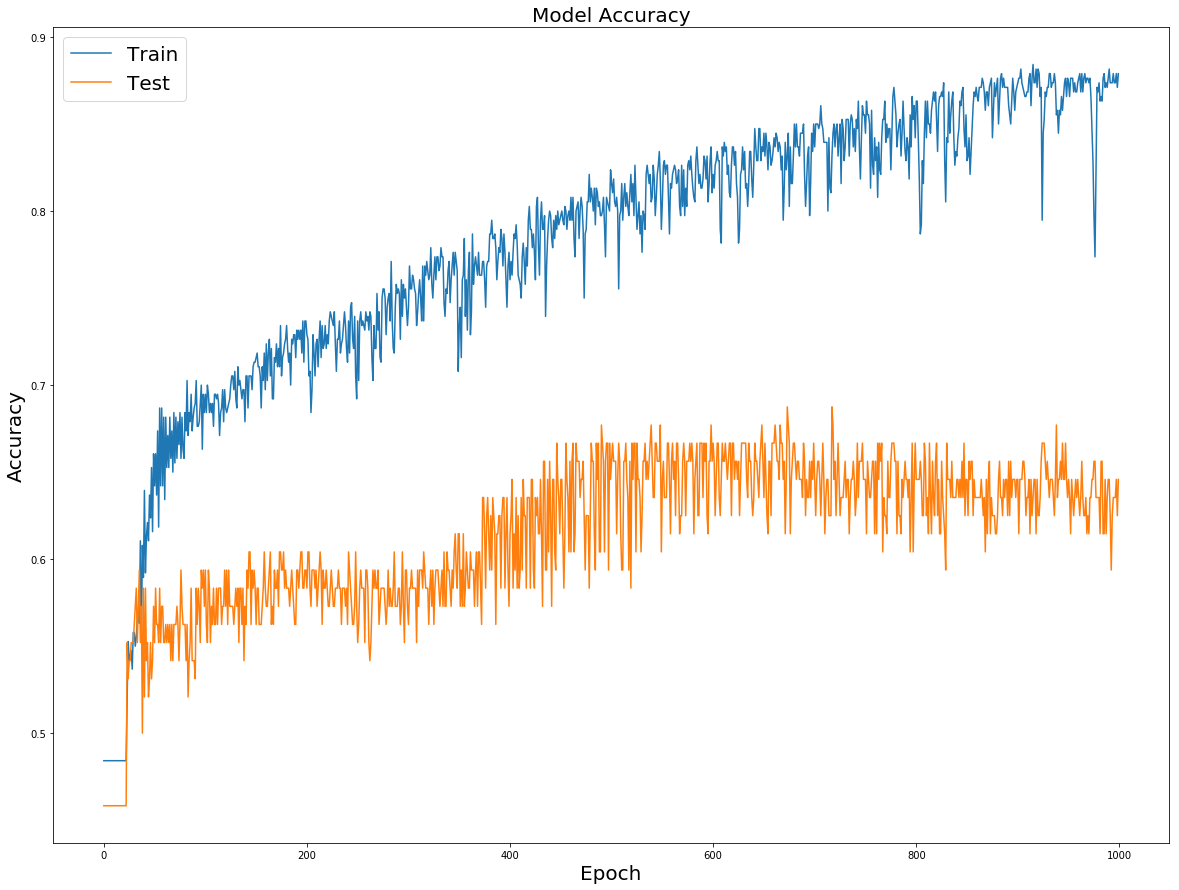

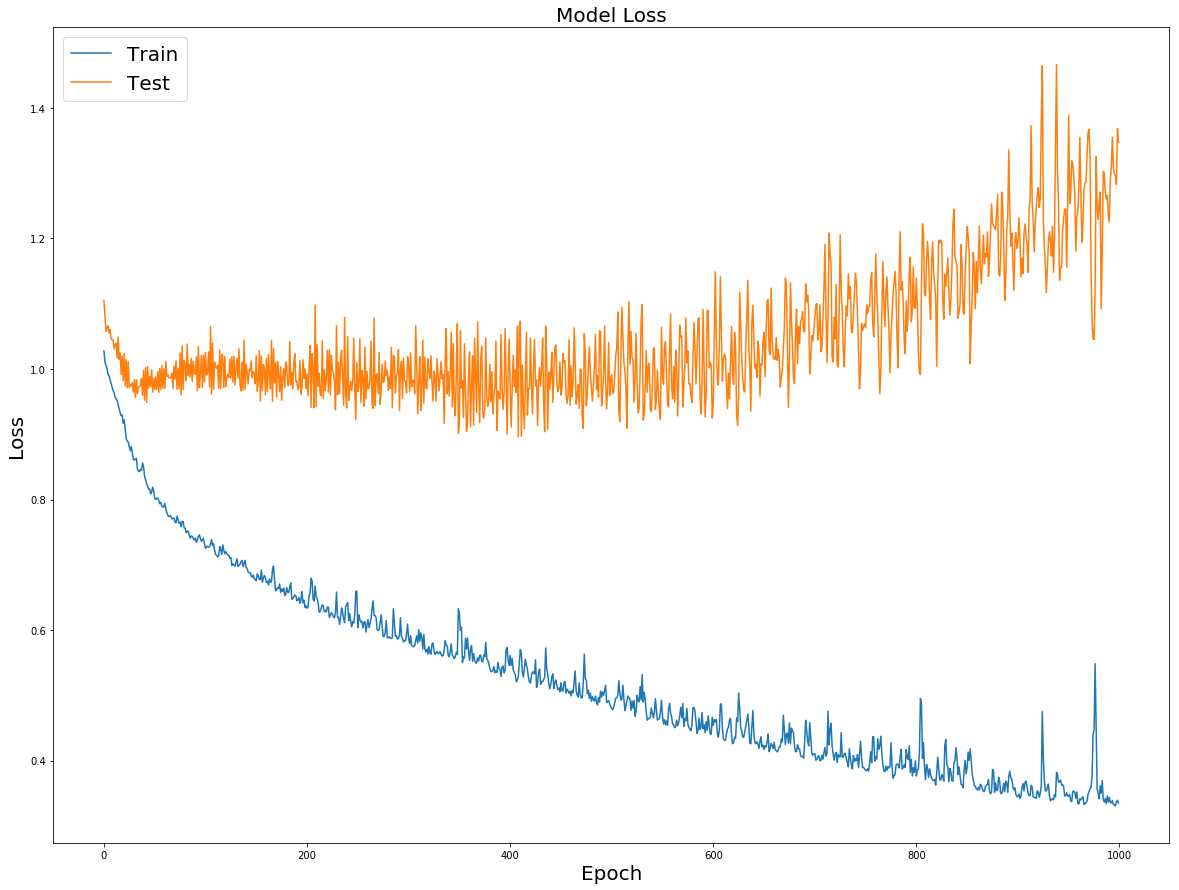

In [62]:
estimator = model.fit([met_train, gut_microb_train, prot_train, phen_train], Y_train, 
                    validation_split = 0.2, epochs = 1000, batch_size = 64, verbose = False)
print("Training Accuracy: ",estimator.history['acc'][-1])
print("Validation Accuracy: ",estimator.history['val_acc'][-1])

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
# summarize history for accuracy
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 20)
plt.show()
# summarize history for loss
plt.figure(figsize=(20,15))
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 20)
plt.show()

Monitoring the traiing of ANN we can see that there is a slight overtraining problem at the end of the training but not that catastrophic. Remember that we did not use Ridge L2 Norm or dropout regularizations. In addition, we did not do extensive grid searc cross-validation for hyperparameter optimization, so there are a lot of way to improve the performance. Let us now use the trained ANN for prediction of BMI classes on the test data set, here we display the matrix of probabilities of the classes:

In [63]:
import numpy as np
np.set_printoptions(suppress=True)
pred = model.predict([met_test, gut_microb_test, prot_test, phen_test])
print(pred[0:10])

[[ 0.09105457  0.89253408  0.01641145]
 [ 0.08332831  0.91146231  0.00520936]
 [ 0.99478734  0.00519763  0.00001502]
 [ 0.09570874  0.74546683  0.15882438]
 [ 0.88526714  0.1124751   0.0022577 ]
 [ 0.99993861  0.00004814  0.00001326]
 [ 0.99803036  0.00196424  0.0000054 ]
 [ 0.99870121  0.00129637  0.00000237]
 [ 0.87005371  0.12877142  0.00117481]
 [ 0.99990165  0.0000977   0.0000006 ]]


In [64]:
print(Y_test[0:10])

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


Now we can compare true vs predicted classes on the test data set and calculate the accuracy of the prediction:

In [65]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(Y_test,axis=1)
print("Predictions: {}".format(predict_classes))
print("Expected: {}".format(expected_classes))

Predictions: [1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 2 0 0 2 1 0 1 0 0 1 1
 2 1 0 1 1 2 1 0 0 0 2 0 1 2 1 2 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 2 2 0 1 2
 0 1 0 1 1 1 1 0 2 0 1 0 1 0 1 2 1 1 1 1 0 1 0 2 0 1 1 1 1 0 1 1 0 2 1 1 2
 0 0 2 0 2 1 1 1]
Expected: [1 1 0 1 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 2 0 1 2 1 0 0 0 0 1 2
 2 0 0 0 1 2 2 1 0 2 2 0 1 0 1 2 0 1 0 2 0 1 1 1 1 0 1 0 1 0 0 1 1 2 0 1 1
 0 1 0 0 2 2 0 0 2 0 1 1 2 0 0 1 0 1 0 1 0 1 0 1 0 1 1 2 2 0 0 1 0 1 1 2 0
 0 1 1 0 1 1 1 1]


In [66]:
from sklearn.metrics import accuracy_score
correct = accuracy_score(expected_classes, predict_classes)
print("Accuracy: {}".format(correct))

Accuracy: 0.6134453781512605


Here for comparison we provide the accuracy of BMI prediction obtained by PLS model from mixOmics:

| OMIC | Accuracy |
| :--- | :--------|
| Metabolomics (no batches) | 60% |
| Prot CVDII (no batches) | 53% |
| Prot CVDIII (no batches)| 65% |
| Prot Inflammation (no batches) | 53% |
| Prot Metabolism (no batches) | 57% |
| Proteomics (CVDII+CVDIII, with batches) | 61% |
| Gut Microbiota (no batches)| 50% |
| Integrative OMICs (with batches) | 63% |

We conclude that even without optimizing hyperparameters through a Grid Search cross-validation, the Integrative OMICs ANN performs almost as good as mixOmics PLS model.